In [73]:
import sys
sys.path.append('/Users/sdbykov/work/self-supervised-halos/')

In [74]:
import requests
import numpy as np
import h5py
from tqdm import tqdm

%matplotlib inline

from utils.data.tng_query import get, HaloInfo
from utils.utils import data_path
data_path = data_path+'tng/'

In [75]:
# first convert log solar masses into group catalog units
mass_min = 10**11 / 1e10 * 0.704
mass_max = 10**15 / 1e10 * 0.704

# form the search_query string by hand for once
search_query = "?mass__gt=" + str(mass_min) + "&mass__lt=" + str(mass_max) +'&primary_flag__gt=0.9'+'&len__gr=150'

url = 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/z=0.0/'+"subhalos/" + search_query
subhalos_all = get(url, {'limit':20000})

count = subhalos_all['count']
print(f"{count} halos with search criteria \n \t {search_query}")

uniform_idxs = np.arange(0, count, count//1000)

subhalos = [subhalos_all['results'][i] for i in uniform_idxs]
subhalos = {sh['id']:sh['url'] for sh in subhalos}



16544 halos with search criteria 
 	 ?mass__gt=7.039999999999999&mass__lt=70400.0&primary_flag__gt=0.9&len__gr=150


In [76]:
download_list = list(subhalos.keys())[::-1]

for id in tqdm(download_list):
    halo_info = HaloInfo(id)
    halo_info.download_halo_snapshot(retry=False, verbose=False)



100%|██████████| 1034/1034 [00:00<00:00, 29299.88it/s]


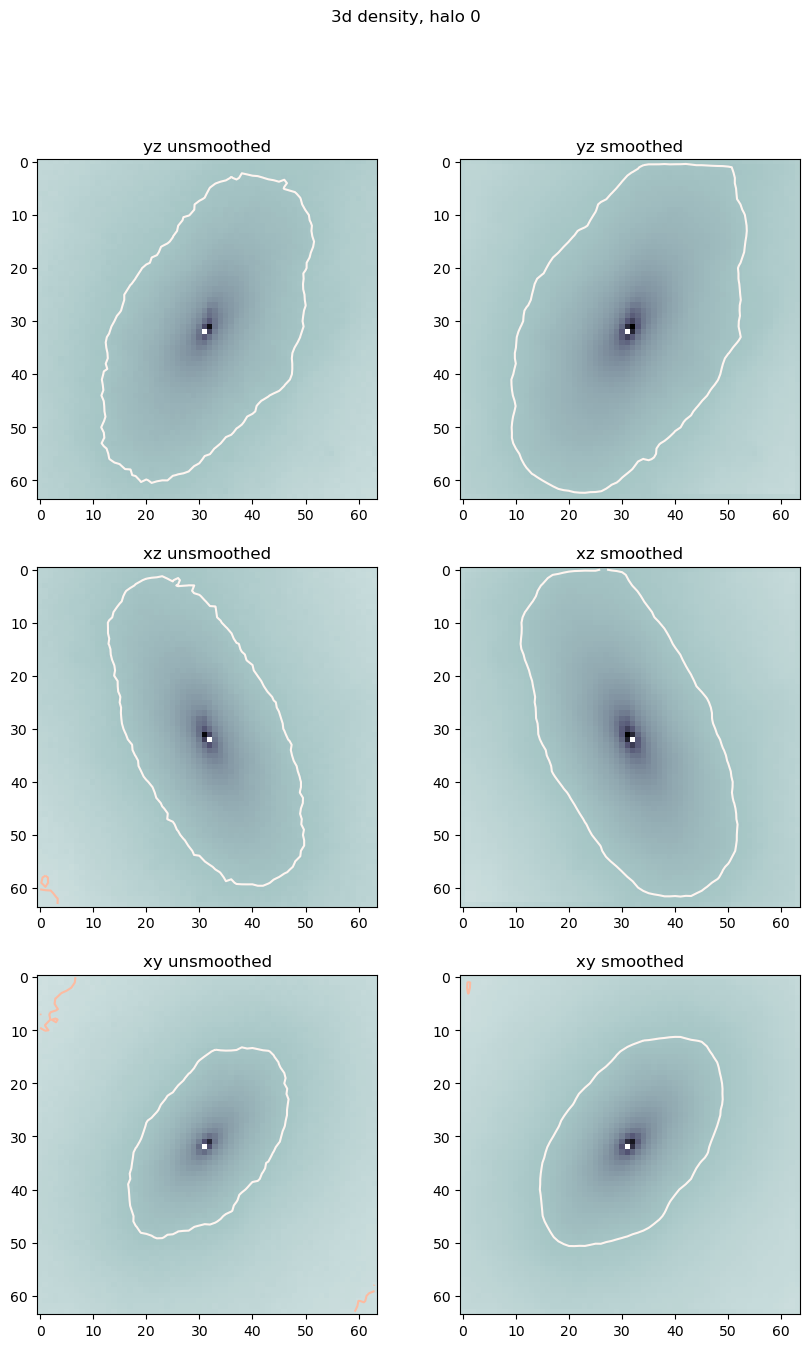

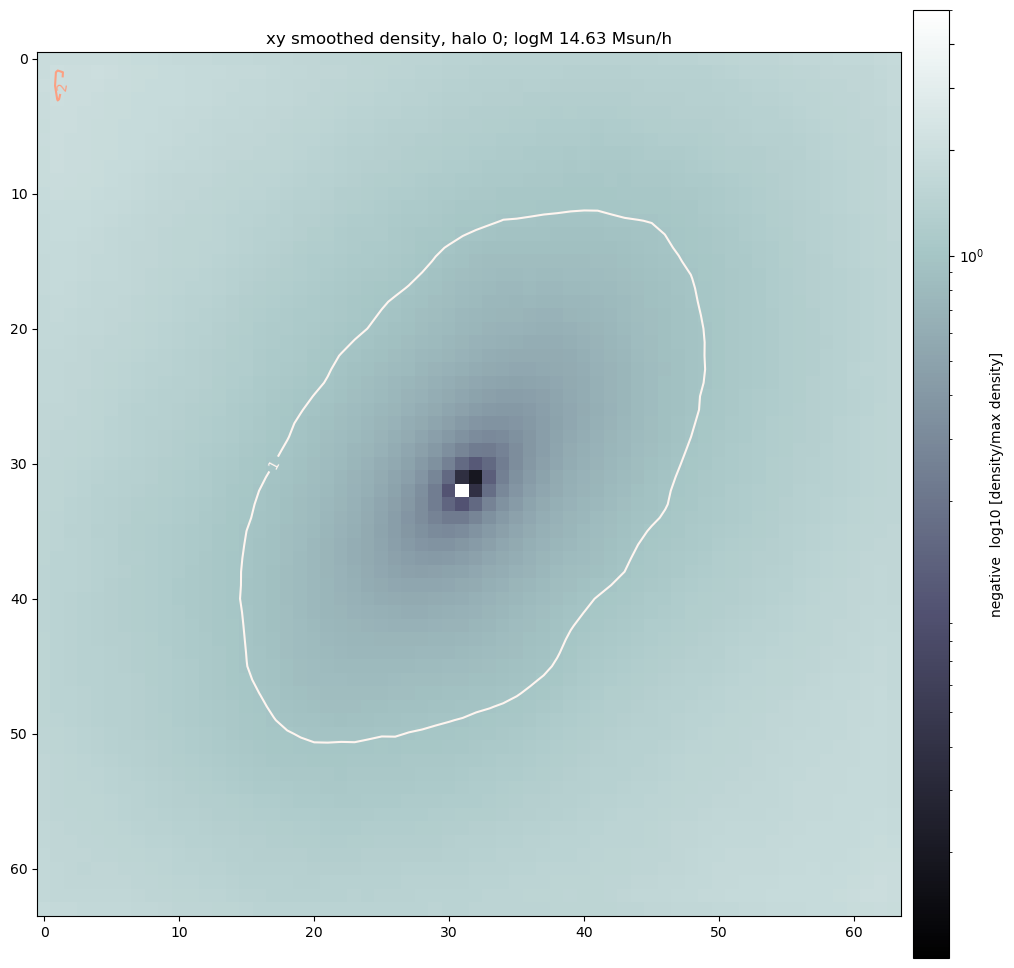

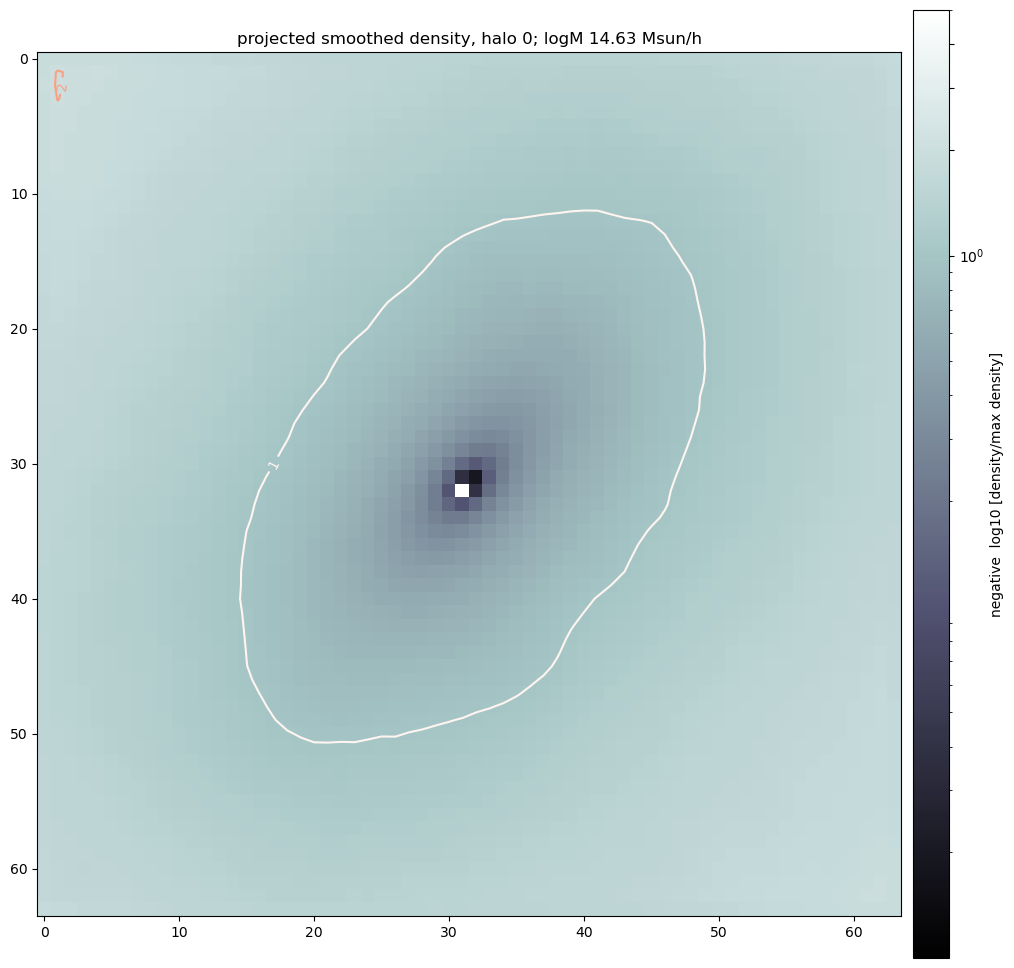

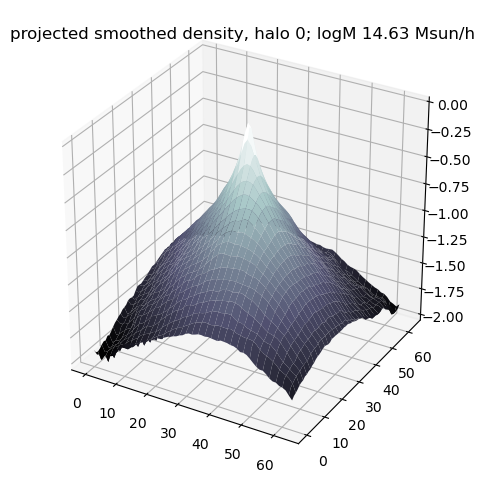

In [124]:
from utils.data.tng_query import HaloInfo

halo = HaloInfo(download_list[-1])


dens = halo.make_3d_density(grid_bins=64)
halo._plot_3d_density(dens)

dens_2d = halo.make_2d_density(grid_bins=64)
halo._plot_2d_density(dens_2d)

halo._plot_2d_density_surface(dens_2d)


In [100]:

np.savez_compressed(data_path[:-4]+f'tng_postprocess/halo_{halo.haloid}_density.npz', hist_smoothed=dens['hist_smoothed'])

np.savez_compressed(data_path[:-4]+f'tng_postprocess/halo_{halo.haloid}_density_2d.npz', hist_smoothed=dens_2d['hist_smoothed'])


In [103]:
arr = dens_2d['hist_smoothed']

In [104]:
len(arr[arr<0])/arr.size

0.0

/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_37654/3124153032.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(arr))


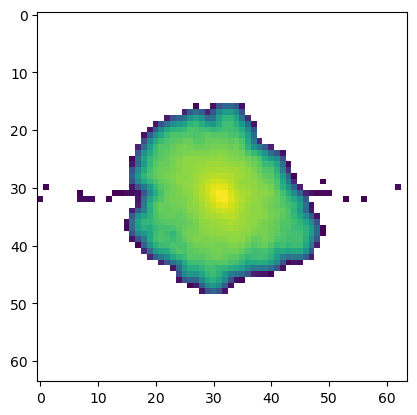

In [105]:
plt.imshow(np.log10(arr))

/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_37654/3740122633.py:10: RuntimeWarning: divide by zero encountered in log10
  Z = np.log10(arr)


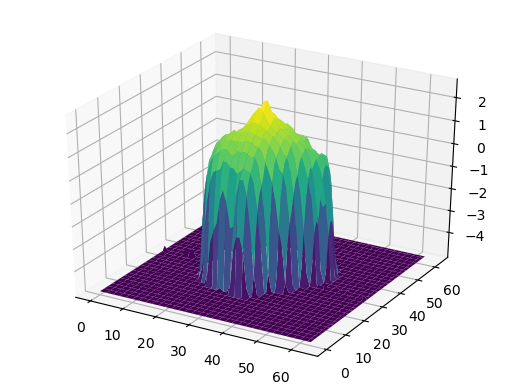

In [118]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0, arr.shape[0])
y = np.arange(0, arr.shape[1])
X, Y = np.meshgrid(x, y)
Z = np.log10(arr)
#make -inf to 0
Z[Z==-np.inf] = np.nanmin(Z[Z!=-np.inf])


ax.plot_surface(X, Y, Z, cmap='viridis')



-4.9993834